### James Griffin 
#### cs 501R
#### third lab 

In [5]:
## Importing packages 
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random


In [20]:
# Just like the last homework except adding a few extra variables 
#this is programming the death component of the virus, which is the saddest thing 
#ever to program lol 

def seird_model(sim, t, N, beta, gamma, delta, alpha, rho):
    ''' function takes into a simulation state, a time, number of people and 
    then parameters for E, beta and gamma as defined in class '''

    S, E, I, R, D = sim
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I

    return dSdt, dEdt, dIdt, dRdt, dDdt

In [32]:
#So we will build a function for simulating the model 
def sim_model():
    #number of people suceptable will be random 
    suceptable = np.random.normal(loc = 5000, scale = 1500, size = 5)
    #and we will start with a pre set number of people infected 
    inf = np.random.normal(loc = 100, scale = 30, size = 1)
    #and we start with a recovered population of 0 
    recov = 0 
    #and we also start with 0 dead and then will take a ratio  of those who are 
    #infected and this will be our population of dead people... that  is horrible to type 
    dead =  0

    #incupation period
    inc_period = [1,3,4,5]
    #modeling the first year 
    days = range(0,365)

    #creating a number of contacts each person comes in contact with while sick
    contacts = np.arange(5,  55, 10)
    '''
    #and infection probabilities for each of those interactions 
    inf_prob = random.choice([.001, .05, .1, .5])
    #number of exposed --> this will be a functio  of our inf_prob and our infected 
    #so whatever our infected prob it will be inf/infected_prob  
    exposed = inf/(1-inf_prob)
    '''
    #and the recovery rate will be the same 
    recov_rate = [.001, .05, .1, .5]
    #from best what I can tell is that the death rate in actuality is rather low
    #so I will have small incramental jumps to see what happens 
    death_rate = [.0001, .0005, .0008, .001]

    #time from infedtion to death
    death_time = [5,8,11,14]

    for i in range(10):
        #and infection probabilities for each of those interactions 
        inf_prob = random.choice([.001, .05, .1, .5])
        #number of exposed --> this will be a functio  of our inf_prob and our infected 
        #so whatever our infected prob it will be inf/infected_prob  
        exposed = inf/(1-inf_prob)
        alpha = random.choice(death_rate)

        S = random.choice(suceptable)
        E = exposed
        I = inf
        R = recov
        D = I*alpha
        N = S+I+R+E-D
        #print(N)
        beta =  random.choice(contacts)*inf_prob
        gamma = random.choice(recov_rate)
        delta = random.choice(inc_period)
        rho = random.choice(death_time)
        #print(rho)
        ret = odeint(seird_model, [S,E,I,R,D], days, args = (N, beta, gamma, delta, alpha, rho))
        S_, E_, I_, R_, D_ = ret.T

        #making plots all nice 
        textstr = 'seir model  simulation'+ "\n"
        textstr += "Susceptable: "+str(S)+'\n'
        textstr += "Infected: "+str(I)+'\n'
        textstr += "Recovered: "+str(R)+'\n'
        textstr += "Pop_number: "+str(N)+'\n'
        textstr += "Gamma: "+str(gamma)+'\n'
        textstr += 'Beta: '+str(beta)+'\n'
        textstr += "Delta: "+str(delta)+'\n'
        textstr += "rho: "+str(rho)+'\n'
        textstr += "R0: "+str(beta/gamma)+'\n'
        textstr += "Death_rate: "+str(alpha)+'\n'

        results = pd.DataFrame( 
            {'Susceptable': S_,
             "Exposed": E_,
             'Infected': I_,
             'Recovered': R_,
             "Dead":D_,
             'Days':days
            })
        print(results.head())
        results.plot(x ='Days', y = ['Susceptable', "Exposed", 
                                     "Infected", 'Recovered', "Dead"], kind = 'area', 
                     stacked = False)
        
        plt.title("SEIRD Model")
        plt.text(1, 0.1, textstr, fontsize = 12,
                 transform=plt.gcf().transFigure)
        plt.show()

   Susceptable     Exposed     Infected  Recovered      Dead  Days
0  3206.489079   55.703765    50.133388   0.000000  0.005013     0
1  2634.560876  256.323006   421.107702   0.185907  0.153754     1
2   891.244639  598.382509  1820.518218   1.211538  0.974341     2
3    60.107744  187.741304  3057.703174   3.763171  3.015851     3
4     2.023871   17.884056  3279.867901   6.972136  5.583280     4


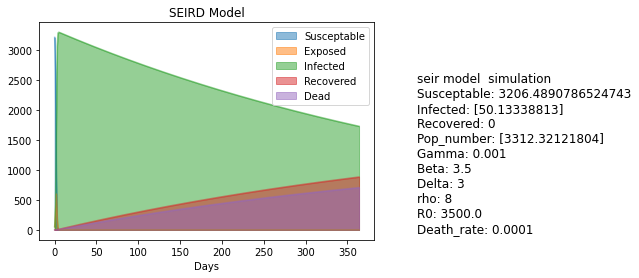

   Susceptable    Exposed   Infected  Recovered      Dead  Days
0  3534.427088  50.183572  50.133388   0.000000  0.005013     0
1  3532.267042   0.802823  97.106133   4.443616  0.129447     1
2  3529.933834   0.465243  94.839531   9.246512  0.263942     2
3  3527.662693   0.450487  92.316244  13.924694  0.394944     3
4  3525.453438   0.438196  89.856679  18.478291  0.522457     4


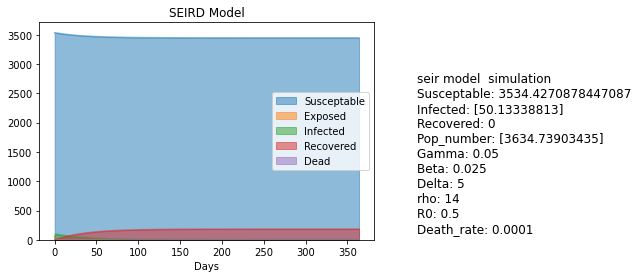

   Susceptable     Exposed    Infected  Recovered      Dead  Days
0  3534.427088   52.771988   50.133388   0.000000  0.050133     0
1  3439.110386   83.483743  114.022464   0.079470  0.686533     1
2  3249.026908  157.164890  228.935958   0.244750  2.010092     2
3  2905.674187  284.561174  441.967731   0.569424  4.610081     3
4  2356.161119  463.155229  807.397426   1.178806  9.490017     4


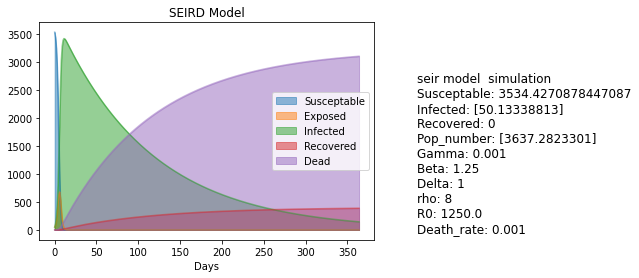

   Susceptable    Exposed    Infected  Recovered      Dead  Days
0  3534.427088  52.771988   50.133388   0.000000  0.050133     0
1  3517.923811  30.228062   81.833329   6.802516  0.594879     1
2  3495.996362  25.184878   98.988355  15.890367  1.322635     2
3  3470.638619  25.453203  112.649571  26.471250  2.169953     3
4  3442.285022  27.440475  126.138227  38.394135  3.124739     4


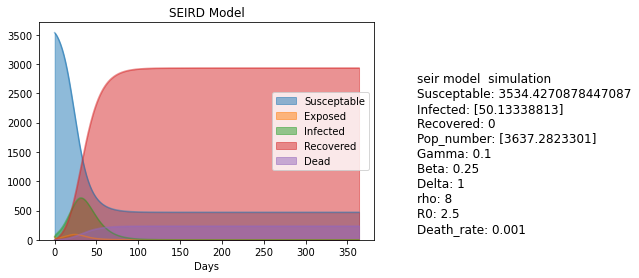

   Susceptable    Exposed   Infected  Recovered      Dead  Days
0  5731.713252  50.183572  50.133388   0.000000  0.050133     0
1  5731.444416  18.632054  53.860660  27.327154  0.816060     1
2  5731.209067   6.999800  41.133499  51.251370  1.486608     2
3  5731.040292   2.678420  27.985373  68.408764  1.967496     3
4  5730.928625   1.053409  18.051749  79.760888  2.285674     4


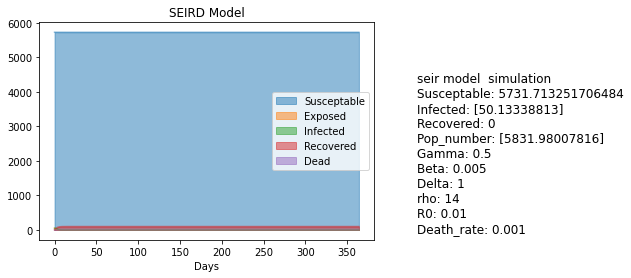

   Susceptable     Exposed     Infected   Recovered       Dead  Days
0  3206.489079   55.703765    50.133388    0.000000   0.040107     0
1  2495.701147  227.450414   563.959160   23.697647   1.557970     1
2   613.231833  348.226881  2184.426697  156.421809  10.059118     2
3    38.554203   48.275403  2780.678788  418.041746  26.816199     3
4     2.238699    2.858610  2576.035726  687.178558  44.054746     4


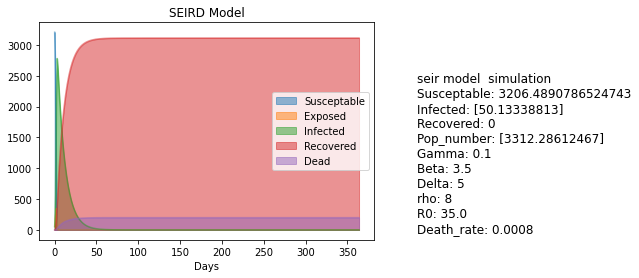

    Susceptable     Exposed     Infected  Recovered       Dead  Days
0  4.001504e+03  100.266776    50.133388   0.000000   0.005013     0
1  1.507697e-01  232.715543  3915.654592   1.879502   1.508765     1
2  8.279602e-10    1.569349  4139.574504   5.977682   4.787637     2
3 -1.178711e-09    0.010574  4133.686898  10.114377   8.097324     3
4 -1.471283e-10    0.000071  4126.263854  14.243941  11.401306     4


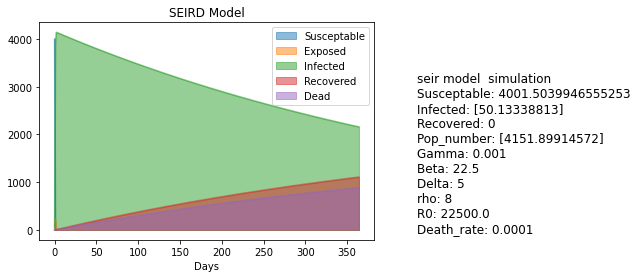

   Susceptable     Exposed     Infected   Recovered       Dead  Days
0  5174.544854   55.703765    50.133388    0.000000   0.025067     0
1  4089.927449  434.852957   741.117715   13.793849   0.715104     1
2   682.095945  762.886841  3710.627907  118.826992   5.969388     2
3    14.544857   70.086286  4834.043742  344.474767  17.257421     3
4     0.249879    2.319305  4665.864688  582.793865  29.179337     4


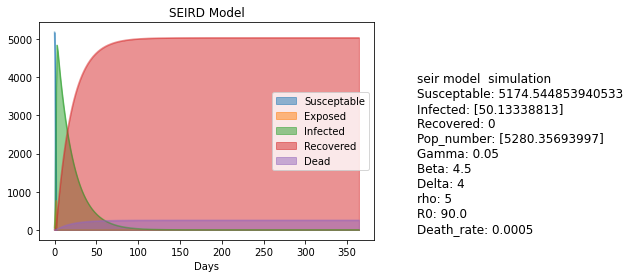

   Susceptable     Exposed     Infected    Recovered       Dead  Days
0  3534.427088   52.771988    50.133388     0.000000   0.025067     0
1  3244.464182   80.468768   242.482534    69.155885   0.786162     1
2  2479.502066  187.395108   680.892985   286.390435   3.176937     2
3  1343.926464  223.786753  1279.831512   781.190342   8.622459     3
4   559.618866  122.082401  1450.268833  1488.975441  16.411990     4


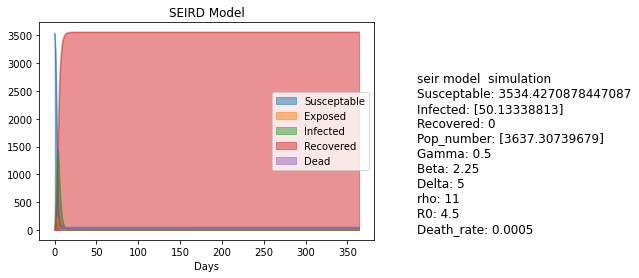

   Susceptable    Exposed   Infected  Recovered      Dead  Days
0  4001.503995  50.183572  50.133388   0.000000  0.040107     0
1  3999.846388   3.027456  64.549274  33.962765  0.475178     1
2  3998.561954   0.518895  41.678524  60.289261  0.812427     2
3  3997.752622   0.256210  25.945110  76.882133  1.024986     3
4  3997.249813   0.155806  16.105982  87.192398  1.157063     4


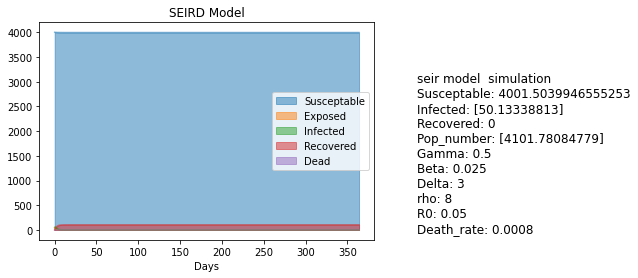

In [33]:
sim_model()

Ok so these graphs had more variability than the graphs from the other homeworks, the third graph, is like a world ending scinario, everybody is dying in that one. This is because beta is high, so each infected person is infecting more than one person a day, couple that with a high number of daily contacts, then yeah, even with a low death rate, the number of dead goes way too high, almost killing everybody 

Similar to the first two homeworks we have graphs that are all blue, again meaning that we have small betas and higher gammas, resulting in an R0 that is really small. This is basically the opposite of  the catestrophic graph, that while everyone is still susceptable, not very many people get sick and even fewer dying 

